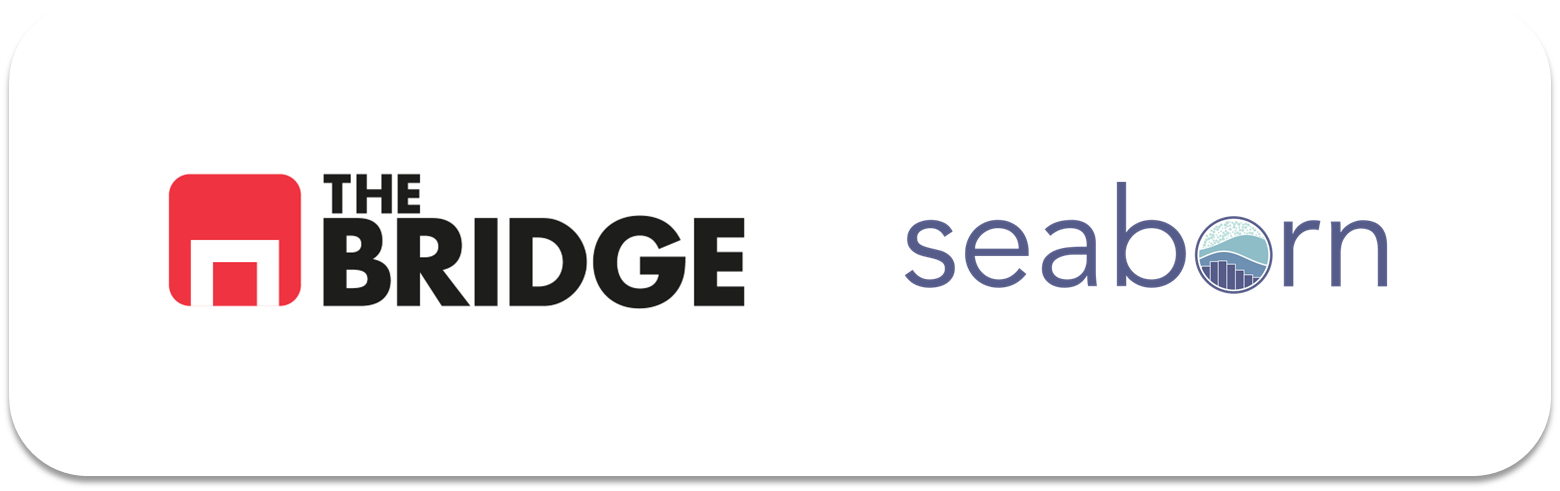

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [2]:
# Cargar el dataset
df_california = pd.read_csv("./data/california_cities.csv")

# Mostrar las primeras filas del dataset para inspeccionarlo
df_california.head()

# Eliminar filas con valores nulos
df_california_clean = df_california.dropna()

# Verificar la limpieza de los datos
df_california_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [5]:
def scatter_plot(df, x_column, y_column, categorical_column=None, 
                 size_column_or_value=None, scale=1, legend=True):
    """
    Función para crear un diagrama de dispersión con opciones para color y tamaño de los puntos.

    Parameters:
    - df: DataFrame con los datos.
    - x_column: Nombre de la columna para el eje X (numérica).
    - y_column: Nombre de la columna para el eje Y (numérica).
    - categorical_column: Nombre de la columna categórica (opcional).
    - size_column_or_value: Nombre de la columna para controlar el tamaño o un valor fijo para tamaño (opcional).
    - scale: Factor de escala para ajustar el tamaño de los puntos si 'size_column_or_value' es una columna (opcional).
    - legend: Si es True, agrega leyenda para colores y tamaños (opcional).

    """
    # Si el tamaño de los puntos es una columna, ajustamos su escala
    if isinstance(size_column_or_value, str):
        size = df[size_column_or_value] * scale
    else:
        size = size_column_or_value
    
    # Crear el gráfico de dispersión
    plt.figure(figsize=(10, 6))
    
    if categorical_column is not None:
        # Si hay columna categórica, usamos hue para los colores
        scatter = sns.scatterplot(data=df, x=x_column, y=y_column, 
                                  hue=categorical_column, size=size_column_or_value,
                                  sizes=(20, 200), palette="viridis")
        # Mostrar leyenda de los colores
        if legend:
            plt.legend(title=categorical_column)
    else:
        # Si no hay columna categórica, solo tamaño
        scatter = sns.scatterplot(data=df, x=x_column, y=y_column, size=size_column_or_value,
                                  sizes=(20, 200), color='blue')
        # Mostrar colorbar para los tamaños
        if legend:
            plt.colorbar(scatter.collections[0], label=size_column_or_value)
    
    plt.title(f'Diagrama de dispersión de {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()


### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

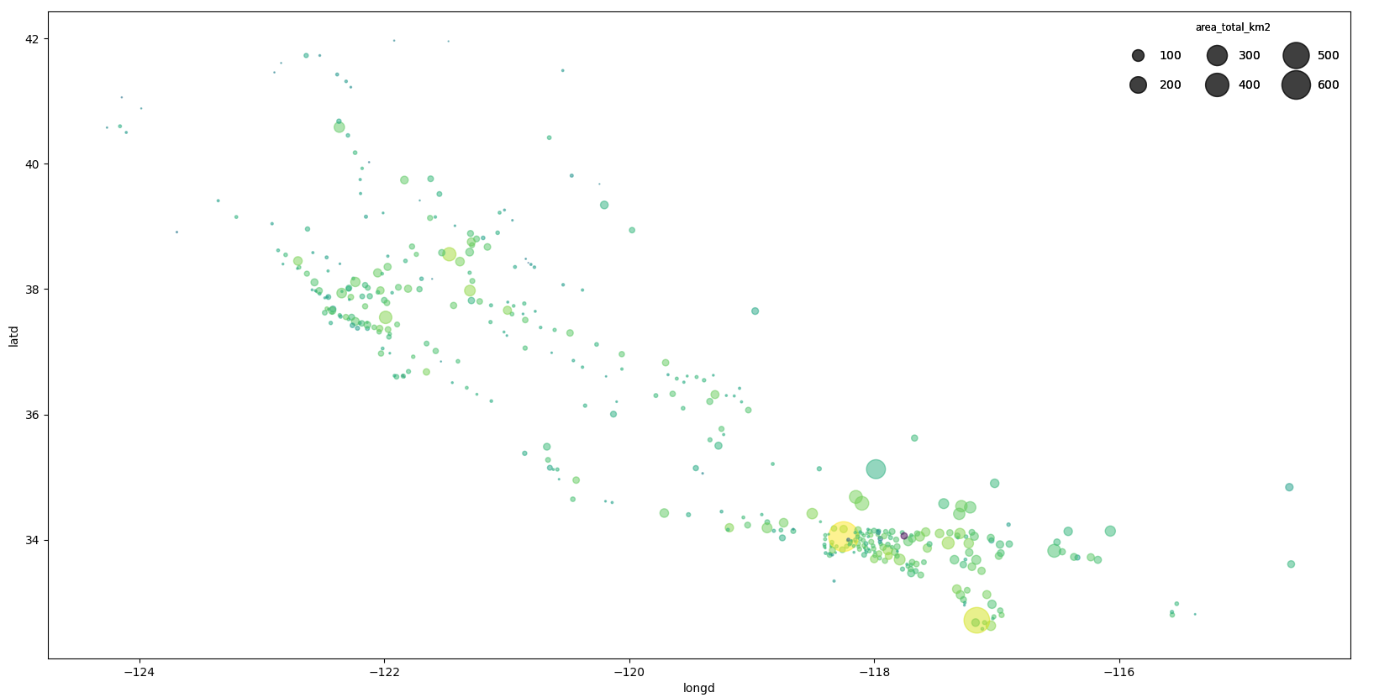

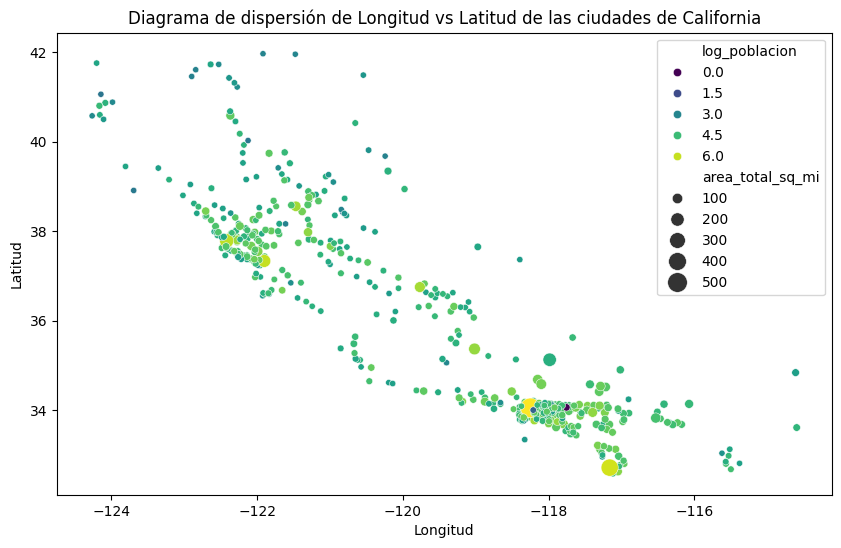

In [6]:
# Crear la columna 'log_poblacion' con el logaritmo decimal de la población
df_california['log_poblacion'] = np.log10(df_california['population_total'])

# Pintar el diagrama de dispersión
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
sns.scatterplot(data=df_california, 
                x='longd', 
                y='latd', 
                size='area_total_sq_mi', 
                hue='log_poblacion', 
                palette='viridis',  # Paleta de colores para la población logarítmica
                sizes=(20, 200),  # Tamaños de los puntos
                legend=True)

# Ajustar título y etiquetas
plt.title('Diagrama de dispersión de Longitud vs Latitud de las ciudades de California')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostrar el gráfico
plt.show()


## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [11]:
# Cargar el dataset
df_titanic = pd.read_csv("./data/titanic.csv")

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


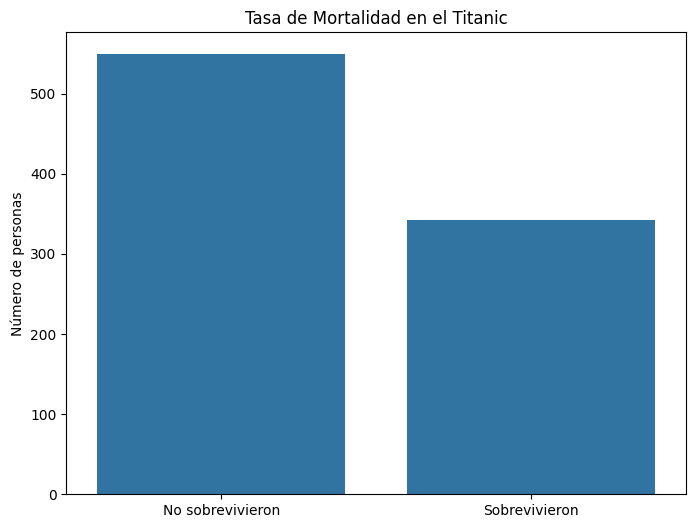

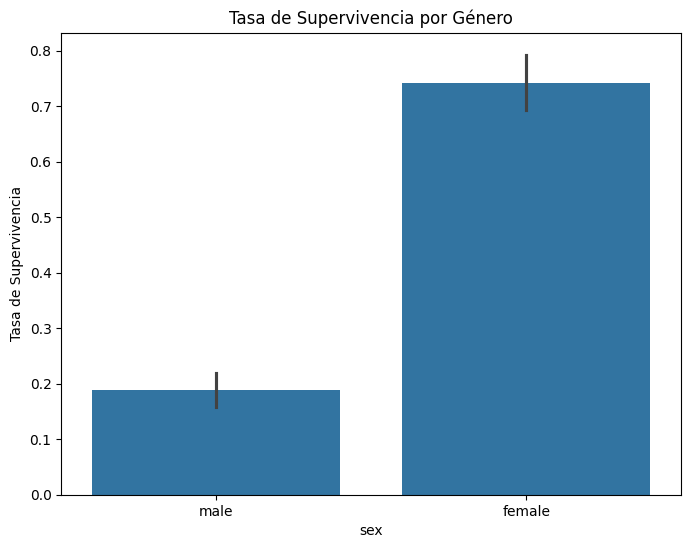

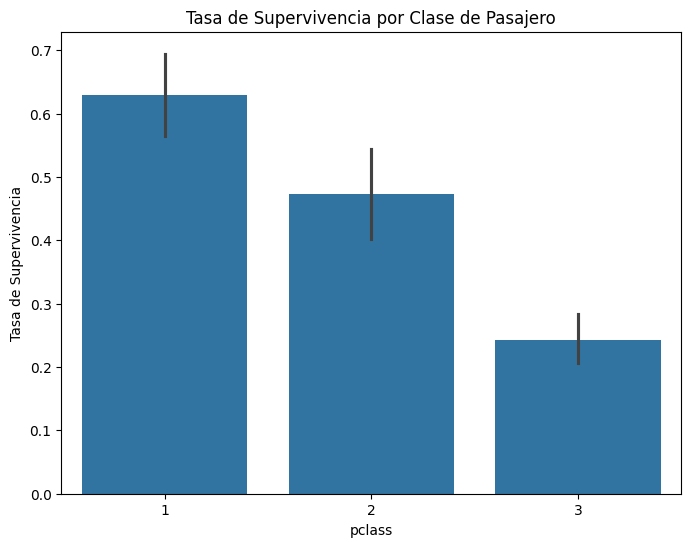

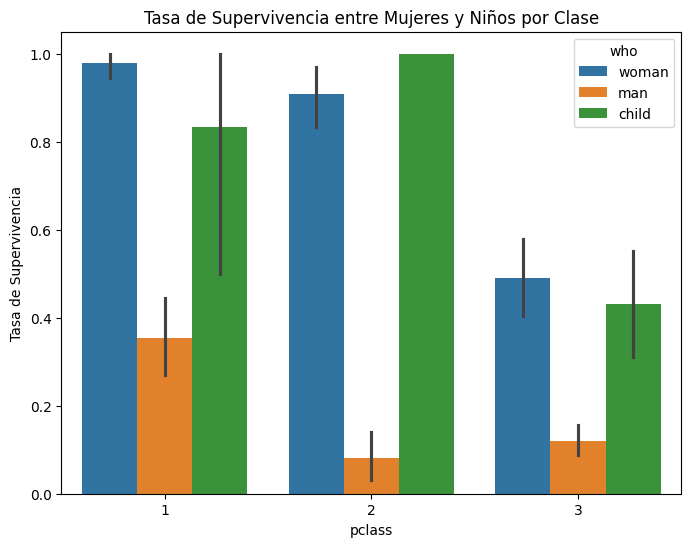

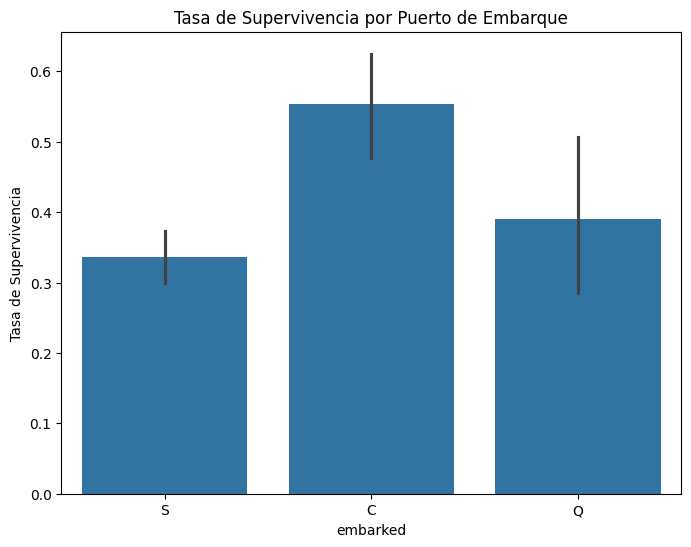

In [12]:
# 1. Tasa de mortalidad alta
# Calculamos la tasa de supervivencia general
survival_rate = df_titanic['survived'].mean()

# Gráfico de la tasa de supervivencia
plt.figure(figsize=(8, 6))
sns.barplot(x=['No sobrevivieron', 'Sobrevivieron'], y=[len(df_titanic[df_titanic['survived'] == 0]), len(df_titanic[df_titanic['survived'] == 1])])
plt.title('Tasa de Mortalidad en el Titanic')
plt.ylabel('Número de personas')
plt.show()

# 2. Las mujeres y los niños primero
# Tasa de supervivencia por género
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='survived', data=df_titanic)
plt.title('Tasa de Supervivencia por Género')
plt.ylabel('Tasa de Supervivencia')
plt.show()

# 3. La influencia de la clase de pasajero
# Tasa de supervivencia por clase
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', data=df_titanic)
plt.title('Tasa de Supervivencia por Clase de Pasajero')
plt.ylabel('Tasa de Supervivencia')
plt.show()

# 4. Diferencias de tasas de supervivencia entre mujeres y niños
# Tasa de supervivencia para mujeres y niños por clase
plt.figure(figsize=(8, 6))
sns.barplot(x='pclass', y='survived', hue='who', data=df_titanic)
plt.title('Tasa de Supervivencia entre Mujeres y Niños por Clase')
plt.ylabel('Tasa de Supervivencia')
plt.show()

# 5. Influencia del puerto de embarque
# Tasa de supervivencia por puerto de embarque
plt.figure(figsize=(8, 6))
sns.barplot(x='embarked', y='survived', data=df_titanic)
plt.title('Tasa de Supervivencia por Puerto de Embarque')
plt.ylabel('Tasa de Supervivencia')
plt.show()
